# Kolokwium 07.06.2022

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tabulate import tabulate
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,  BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from services.text_tokenizer import  *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from services.prepare_data2 import prepare_data2


# Import danych

In [3]:

airlines = pd.read_csv('./data/tweets_airline.csv', usecols=['airline_sentiment','text'], encoding='UTF-8')

# Przygotowanie danych

(Oczyszczanie kolumny z tekstem tweeta)

* `prepare_data2` - funkcja zawierająca poniższe funkcje składowe:
* `clean_text` - oczyszczanie tekstu
* `delete_stopwords` - usuwanie stopwords
* `stem_text` - stemming tekstu

Funkcje pomocnicze wchodzące w skład funkcji prepare_data2 znajdują się w katalogu **services**.

In [3]:
airlines_cl = prepare_data2(airlines)

# Wordcloud


In [4]:
def wordcloud(df):
    uniques = list(set(df))
    bow = {unique: df.count(unique) for unique in uniques}
    wc = WordCloud(width=1000, height=1000, background_color='white',
                   colormap='Blues')
    wc_freq = wc.generate_from_frequencies(bow)
    plt.axis("off")
    plt.imshow(wc_freq, interpolation='bilinear')
    plt.title(f"Most frequent words in tweets about Airlines")
    plt.show()

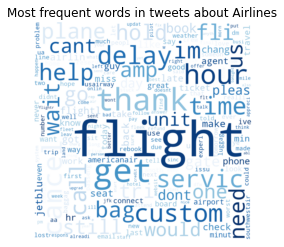

In [5]:
wordcloud(airlines_cl)

In [6]:
def analyze_tokens_and_doc(dataset, color: str):
    dataset = dataset['text']

    vectorizer = CountVectorizer(tokenizer=text_tokenizer)
    vectorizer_tf = TfidfVectorizer(tokenizer=text_tokenizer)

    X_transform_sample = vectorizer.fit_transform(dataset)
    X_transform_sample_tf = vectorizer_tf.fit_transform(dataset)
    titles = (vectorizer.get_feature_names_out())
    array = X_transform_sample.toarray()
    array_tf = X_transform_sample_tf.toarray()


    ''' Display top 15 tokens  '''

    column_sum = np.sum(array, axis=0)
    max_val_col = np.argpartition(column_sum, -15)[-15:]
    top_15 = column_sum[max_val_col]

    ''' Display top 15 documents  '''

    row_sum = np.sum(array, axis=1)
    max_val_row = np.argpartition(row_sum, -15)[-15:]
    top_15_docs = row_sum[max_val_row]


    ''' Display top 15 most important tokens  '''

    tf_col_sum = np.sum(array_tf, axis=0)
    max_tf_val_col = np.argpartition(tf_col_sum, -15)[-15:]
    top_15_tf = tf_col_sum[max_tf_val_col]

    ''' Bar plot of quantity top 15 tokens'''

    top_15_tokens = titles[np.argpartition(column_sum, -15)[-15:]]
    top_15_quantity = column_sum[max_val_col]

    plt.barh(top_15_tokens, top_15_quantity, color= color)
    plt.title('Quantity of top 15 tokens in tweets about Airlines')
    plt.xlabel('Quantity')
    plt.ylabel('Tokens')
    plt.show()

    ''' Pretty table '''

    df_1 = pd.DataFrame({'titles': top_15_tokens, 'quantity': top_15_quantity})

    top_15_tf_tokens = titles[np.argpartition(tf_col_sum, -15)[-15:]]
    top_15_tf_quantity = tf_col_sum[max_tf_val_col]
    print(tabulate(df_1, headers='keys', tablefmt='psql'))

    ''' Bar plot of TF-IDF indexes top 15 most important tokens'''

    plt.barh(top_15_tf_tokens, top_15_tf_quantity, color= color)
    plt.title('TFIDF of top 15 most important tokens in tweets about Airlines')
    plt.xlabel('TFIDF')
    plt.ylabel('Tokens')
    plt.show()

    ''' Pretty table '''

    df_2 = pd.DataFrame({'titles': top_15_tf_tokens, 'TFIDF': top_15_tf_quantity})
    print(tabulate(df_2, headers='keys', tablefmt='psql'))

    ''' Binary weight '''

    vectorizer_bw = CountVectorizer(tokenizer=text_tokenizer, binary=True)
    X_transform_bw_sample = vectorizer_bw.fit_transform(dataset)
    titles_bw = (vectorizer_bw.get_feature_names_out())
    array_bw = X_transform_bw_sample.toarray()

    column_sum_bw = np.sum(array_bw, axis=0)
    max_val_col_bw = np.argpartition(column_sum_bw, -15)[-15:]
    top_15_bw = column_sum_bw[max_val_col_bw]

    top_15_bw_terms = titles_bw[np.argpartition(column_sum_bw, -15)[-15:]]

    plt.barh(top_15_bw_terms, top_15_bw, color= color)
    plt.title('Top 15 Crucial Tokens based on binary weight in tweets about Airlines')
    plt.xlabel('Weight')
    plt.ylabel('Term')
    plt.show()

    ''' Pretty table '''

    df_3 = pd.DataFrame({'term': top_15_bw_terms, 'weight': top_15_bw})
    print(tabulate(df_3, headers='keys', tablefmt='psql'))

# Pozostałe wizualizacje (tokeny i dokumenty)

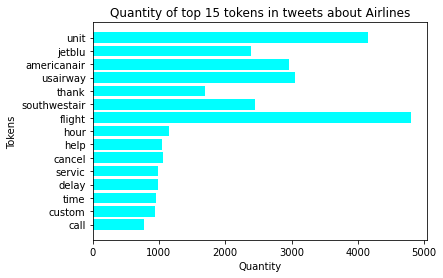

+----+--------------+------------+
|    | titles       |   quantity |
|----+--------------+------------|
|  0 | call         |        768 |
|  1 | custom       |        936 |
|  2 | time         |        960 |
|  3 | delay        |        980 |
|  4 | servic       |        992 |
|  5 | cancel       |       1056 |
|  6 | help         |       1042 |
|  7 | hour         |       1151 |
|  8 | flight       |       4808 |
|  9 | southwestair |       2456 |
| 10 | thank        |       1689 |
| 11 | usairway     |       3052 |
| 12 | americanair  |       2958 |
| 13 | jetblu       |       2391 |
| 14 | unit         |       4152 |
+----+--------------+------------+


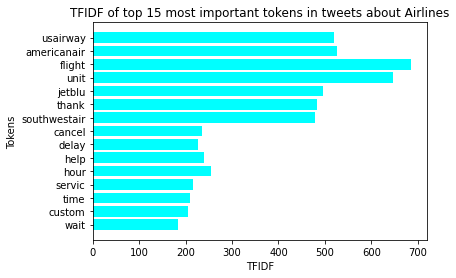

+----+--------------+---------+
|    | titles       |   TFIDF |
|----+--------------+---------|
|  0 | wait         | 182.984 |
|  1 | custom       | 205.431 |
|  2 | time         | 210.115 |
|  3 | servic       | 216.926 |
|  4 | hour         | 255.163 |
|  5 | help         | 239.925 |
|  6 | delay        | 227.153 |
|  7 | cancel       | 234.976 |
|  8 | southwestair | 477.882 |
|  9 | thank        | 482.175 |
| 10 | jetblu       | 496.507 |
| 11 | unit         | 646.674 |
| 12 | flight       | 686.203 |
| 13 | americanair  | 525.076 |
| 14 | usairway     | 520.17  |
+----+--------------+---------+


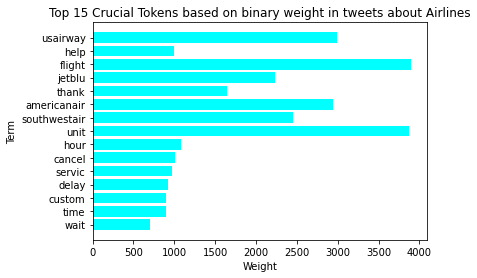

+----+--------------+----------+
|    | term         |   weight |
|----+--------------+----------|
|  0 | wait         |      707 |
|  1 | time         |      895 |
|  2 | custom       |      904 |
|  3 | delay        |      920 |
|  4 | servic       |      966 |
|  5 | cancel       |     1011 |
|  6 | hour         |     1087 |
|  7 | unit         |     3877 |
|  8 | southwestair |     2448 |
|  9 | americanair  |     2946 |
| 10 | thank        |     1648 |
| 11 | jetblu       |     2237 |
| 12 | flight       |     3902 |
| 13 | help         |     1000 |
| 14 | usairway     |     2990 |
+----+--------------+----------+


In [7]:
analyze_tokens_and_doc(airlines, 'cyan')

# Klasyfikacja tekstu

## Wykorzystane modele do klasyfikacji
* Multinomial Logistic Regression
* Random Forest
* Gradient Boosting
* MLP
* Bagging

## Wektoryzacja i dzielenie modelu na zbiór uczący i testowy (70%/30%)

In [9]:
X = airlines['text']
y = airlines['airline_sentiment']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=1)

vectorizer = CountVectorizer(tokenizer=text_tokenizer) # funkcja text_tokenizer zawiera także funkcje oczyszczające dane

X_train_transform = vectorizer.fit_transform(X_train)
X_test_transform = vectorizer.transform(X_test)

## Predykcja

### Multinomial Logistic Regression

Multinomial Logistic Regression accuracy:  0.7744
              precision    recall  f1-score   support

    negative       0.84      0.88      0.86      2741
     neutral       0.60      0.56      0.58       936
    positive       0.73      0.67      0.70       715

    accuracy                           0.77      4392
   macro avg       0.72      0.70      0.71      4392
weighted avg       0.77      0.77      0.77      4392



Text(0.5, 1.0, 'Multinomial Logistic Regression')

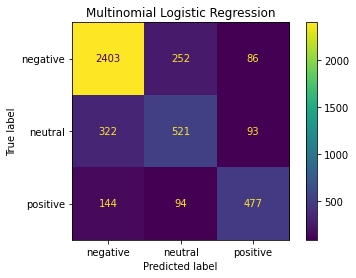

In [12]:
mlg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=150)
mlg  = mlg.fit(X_train_transform,Y_train)

# Ocena modelu

print("Multinomial Logistic Regression accuracy: ", round(mlg.score(X_test_transform,Y_test),4))
y_pred_mlg= mlg.predict(X_test_transform)

print(classification_report(Y_test, y_pred_mlg))

mlg_cm = confusion_matrix(Y_test, y_pred_mlg)
plt = ConfusionMatrixDisplay(confusion_matrix=mlg_cm, display_labels=['negative', 'neutral', 'positive'])
plt.plot()
plt.ax_.set_title("Multinomial Logistic Regression")

### Random Forest Classifier

Random forest classifier prediction accuracy:  0.752
              precision    recall  f1-score   support

    negative       0.81      0.89      0.85      2741
     neutral       0.58      0.49      0.53       936
    positive       0.70      0.58      0.63       715

    accuracy                           0.75      4392
   macro avg       0.69      0.65      0.67      4392
weighted avg       0.74      0.75      0.74      4392



Text(0.5, 1.0, 'Random Forest Classifier')

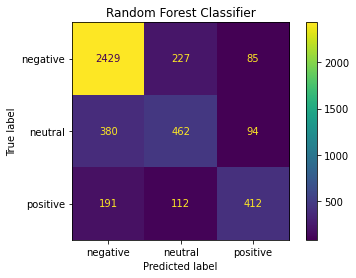

In [20]:
rf = RandomForestClassifier(n_estimators=150)
rf = rf.fit(X_train_transform,Y_train)

# Ocena modelu

print("Random forest classifier prediction accuracy: ", round(rf.score(X_test_transform,Y_test),4))
y_pred_rfcl= rf.predict(X_test_transform)

print(classification_report(Y_test, y_pred_rfcl))

rfcl_cm = confusion_matrix(Y_test, y_pred_rfcl)
plt = ConfusionMatrixDisplay(confusion_matrix=rfcl_cm, display_labels=['negative', 'neutral', 'positive'])
plt.plot()
plt.ax_.set_title("Random Forest Classifier")

### Gradient Boosting Classifier

Gradient Boosting classifier prediction accuracy:  0.7202
              precision    recall  f1-score   support

    negative       0.73      0.95      0.82      2741
     neutral       0.68      0.17      0.27       936
    positive       0.71      0.57      0.63       715

    accuracy                           0.72      4392
   macro avg       0.70      0.56      0.57      4392
weighted avg       0.71      0.72      0.67      4392



Text(0.5, 1.0, 'Gradient Boosting Classifier')

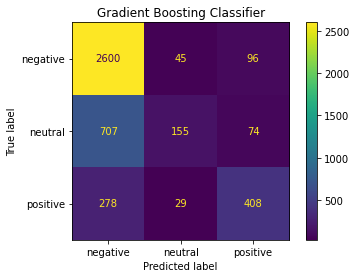

In [21]:
clf = GradientBoostingClassifier()
clf  = clf.fit(X_train_transform,Y_train)

# Ocena modelu

print("Gradient Boosting classifier prediction accuracy: ", round(clf.score(X_test_transform,Y_test),4))
y_pred_clf= clf.predict(X_test_transform)

print(classification_report(Y_test, y_pred_clf))

rfcl_cm = confusion_matrix(Y_test, y_pred_clf)
plt = ConfusionMatrixDisplay(confusion_matrix=rfcl_cm, display_labels=['negative', 'neutral', 'positive'])
plt.plot()
plt.ax_.set_title("Gradient Boosting Classifier")

### Multilayer perceptron

MLP classifier prediction accuracy:  0.7782
              precision    recall  f1-score   support

    negative       0.85      0.87      0.86      2741
     neutral       0.60      0.57      0.58       936
    positive       0.73      0.69      0.71       715

    accuracy                           0.78      4392
   macro avg       0.72      0.71      0.72      4392
weighted avg       0.77      0.78      0.78      4392



Text(0.5, 1.0, 'Multilayer perceptron Classifier')

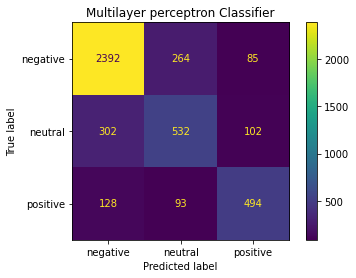

In [13]:
mlp = MLPClassifier(early_stopping=True)
mlp  = mlp.fit(X_train_transform,Y_train)

# Ocena modelu

print("MLP classifier prediction accuracy: ", round(mlp.score(X_test_transform,Y_test),4))
y_pred_mlp= mlp.predict(X_test_transform)

print(classification_report(Y_test, y_pred_mlp))

mlp_cm = confusion_matrix(Y_test, y_pred_mlp)
plt = ConfusionMatrixDisplay(confusion_matrix=mlp_cm, display_labels=['negative', 'neutral', 'positive'])
plt.plot()
plt.ax_.set_title("Multilayer perceptron Classifier")

Bagging classifier prediction accuracy:  0.7261
              precision    recall  f1-score   support

    negative       0.82      0.84      0.83      2741
     neutral       0.51      0.51      0.51       936
    positive       0.65      0.59      0.62       715

    accuracy                           0.73      4392
   macro avg       0.66      0.64      0.65      4392
weighted avg       0.72      0.73      0.72      4392



Text(0.5, 1.0, 'Bagging Classifier')

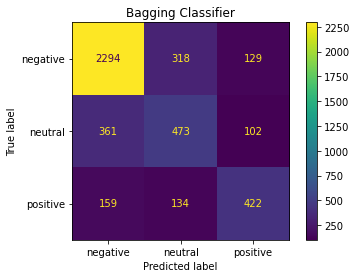

In [23]:
bg = BaggingClassifier()
bg  = bg.fit(X_train_transform, Y_train)

# Ocena modelu

print("Bagging classifier prediction accuracy: ", round(bg.score(X_test_transform,Y_test),4))
y_pred_bg= bg.predict(X_test_transform)

print(classification_report(Y_test, y_pred_bg))

bg_cm = confusion_matrix(Y_test, y_pred_bg)
plt = ConfusionMatrixDisplay(confusion_matrix=bg_cm, display_labels=['negative', 'neutral', 'positive'])
plt.plot()
plt.ax_.set_title("Bagging Classifier")

# Porównanie skuteczności modeli


| Pos | Classifier | Accuracy |
| :- | -: | :-: |
| 1 | MLP | **77,82%**
| 2 | Multinomial Logistic Regression | **77,44%**
| 3 | Random Forest | **75,20%**
| 4 | Bagging | **72,61%**
| 5 | Gradient Boosting | **72,02%**


# Ocena jakości predykcji najlepszego modelu

Ocena jakości predykcji dla najlepszego modelu - **MLP Classifier**

In [15]:
print("MLP classifier prediction accuracy: ", round(mlp.score(X_test_transform,Y_test),4))

print(classification_report(Y_test, y_pred_mlp))

MLP classifier prediction accuracy:  0.7782
              precision    recall  f1-score   support

    negative       0.85      0.87      0.86      2741
     neutral       0.60      0.57      0.58       936
    positive       0.73      0.69      0.71       715

    accuracy                           0.78      4392
   macro avg       0.72      0.71      0.72      4392
weighted avg       0.77      0.78      0.78      4392



* **Overall model accuracy**: 77,82% wszystkich tweetów zostało poprawnie sklasyfikowanych z odpowiadającym sentymentem.

**Negative class**

* **Precision**: 85% tweetow sklasyfikowanych jako negatywny sentyment okazało się sklasyfikowanych poprawnie.
* **Recall (sensitivity)**: Ze wszystkich tweetów, które w rzeczywistości miały sentyment negatywny, 87% zostało poprawnie sklasyfikowanych jako negatywne.
* **f1-score**: f1 na poziomie 0.86 świadczy, że model dobrze przewiduje każdą obserwacje tej klasy.

**Neutral class**

* **Precision**: 60% tweetow skalsyfikowanych jako neutralny sentyment okazało się sklasyfikowanych poprawnie.
* **Recall (sensitivity)**: Ze wszystkich tweetów, które w rzeczywistości miały sentyment neutralny, 57% zostało poprawnie sklasyfikowanych jako neutralne.
* **f1-score**: f1 na poziomie 0.58 świadczy, że model średnio przewiduje każdą obserwacje tej klasy.

**Positive class**

* **Precision**: 73% tweetow sklasyfikowanych jako pozytywny sentyment okazało się sklasyfikowanych poprawnie.
* **Recall (sensitivity)**: Ze wszystkich tweetów, które w rzeczywistości miały sentyment pozytywny, 69% zostało poprawnie sklasyfikowanych jako pozytywne.
* **f1-score**: f1 na poziomie 0.71 świadczy, że model średnio przewiduje każdą obserwacje tej klasy.

**Podsumowanie** - klasyfikator osiągnął średnią skuteczność, ale być może wystarczającą do prognozowania sentymentów - do stwierdzenia konieczna byłaby dalsza analiza przypadku i stawianych klasyfikacji wymagań. Najtrafniej przewidywane były tweety o sentymencie negatywnym, natomiast najsłabiej o sentymencie neutralnym.


